In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm

In [3]:
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Excluir Nulos e Duplicados

In [4]:
print('Não encontrado nenhum dado Null.')
print(diabetes_df[(diabetes_df.Pregnancies.isnull()) | (diabetes_df.Glucose.isnull()) | (diabetes_df.BloodPressure.isnull()) | (diabetes_df.SkinThickness.isnull()) | (diabetes_df.Insulin.isnull()) | (diabetes_df.BMI.isnull()) | (diabetes_df.DiabetesPedigreeFunction.isnull()) | (diabetes_df.Age.isnull()) | (diabetes_df.Outcome.isnull())])
#diabetes_df=diabetes_df.dropna()
print('Não encontrado nenhum dado duplicado.')
print(diabetes_df[diabetes_df.duplicated(keep=False)])
#diabetes_df=diabetes_df.drop_duplicates()

Não encontrado nehum dado Null.
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Encontrado alguns dados duplicado.
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Ver Colunas com Valor Zero.

In [21]:
print('Metade dos dados praticamente possui entrada com 0 em campos importante.')
diabetes_df[(diabetes_df.Glucose==0) | (diabetes_df.BloodPressure==0) | (diabetes_df.SkinThickness==0) | (diabetes_df.Insulin==0) | (diabetes_df.BMI==0) | (diabetes_df.BMI==0)]
diabetes_df=diabetes_df.drop(diabetes_df[(diabetes_df.Glucose==0) | (diabetes_df.BloodPressure==0) | (diabetes_df.SkinThickness==0) | (diabetes_df.Insulin==0) | (diabetes_df.BMI==0) | (diabetes_df.BMI==0)].index, axis=0)

Metade dos dados praticamente possui entrada com 0 em campos importante.


Boxplot para visualizar melhor a distribuiçao dos dados por coluna

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

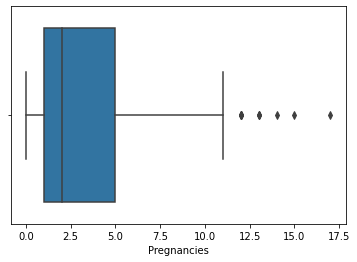

In [22]:
sns.boxplot(diabetes_df.Pregnancies)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

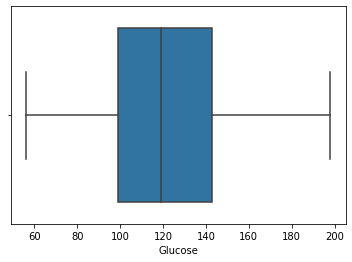

In [24]:
sns.boxplot(diabetes_df.Glucose)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

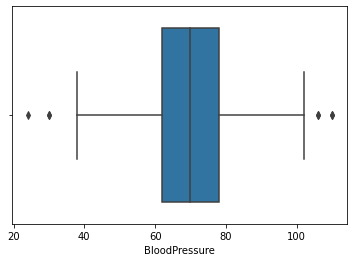

In [25]:
sns.boxplot(diabetes_df.BloodPressure)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

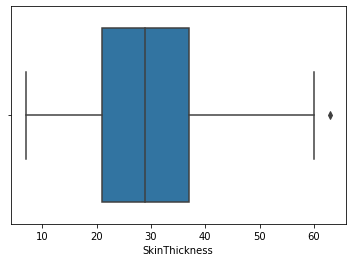

In [26]:
sns.boxplot(diabetes_df.SkinThickness)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

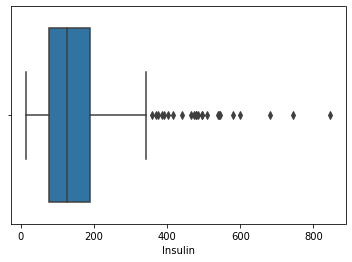

In [27]:
sns.boxplot(diabetes_df.Insulin)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

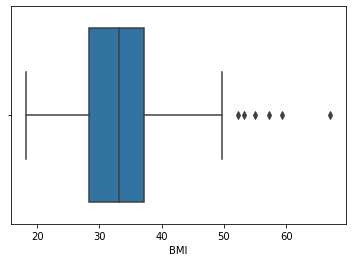

In [28]:
sns.boxplot(diabetes_df.BMI)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

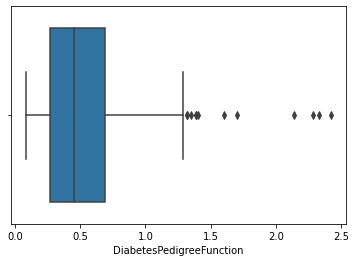

In [29]:
sns.boxplot(diabetes_df.DiabetesPedigreeFunction)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

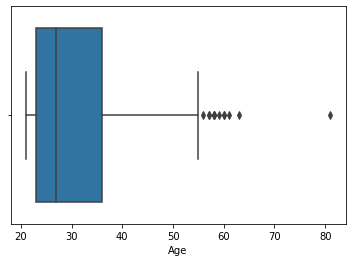

In [30]:
sns.boxplot(diabetes_df.Age)

Analizar Kurtosis

In [31]:
diabetes_df.Pregnancies.kurtosis()

1.4863417448340144

In [32]:
diabetes_df.Glucose.kurtosis()

-0.48322696131655807

In [33]:
diabetes_df.BloodPressure.kurtosis()

0.7954044447041766

In [34]:
diabetes_df.SkinThickness.kurtosis()

-0.45769608865023415

In [35]:
diabetes_df.Insulin.kurtosis()

6.356505089203407

In [36]:
diabetes_df.BMI.kurtosis()

1.5565130639494997

In [37]:
diabetes_df.DiabetesPedigreeFunction.kurtosis()

6.36668987920683

In [38]:
diabetes_df.Age.kurtosis()

1.7375308358734136

Analizar Skew

In [39]:
diabetes_df.Pregnancies.skew()

1.3355962679659634

In [40]:
diabetes_df.Glucose.skew()

0.5178499371777541

In [41]:
diabetes_df.BloodPressure.skew()

-0.08751639156004226

In [42]:
diabetes_df.SkinThickness.skew()

0.20931080688997156

In [43]:
diabetes_df.Insulin.skew()

2.1651161863573374

In [44]:
diabetes_df.BMI.skew()

0.663485056210774

In [45]:
diabetes_df.DiabetesPedigreeFunction.skew()

1.9591011676798942

In [46]:
diabetes_df.Age.skew()

1.4036065447817476

Analisar covariancia

In [48]:
diabetes_df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,10.313247,19.652043,8.561981,3.147933,30.144188,-0.572058,0.008390,22.263310,0.388408
Glucose,19.652043,952.387781,80.994467,64.537672,2131.662900,45.439613,1.494605,108.179694,7.502349
BloodPressure,8.561981,80.994467,156.152304,30.563156,146.295162,26.732178,-0.068951,38.245916,1.134976
SkinThickness,3.147933,64.537672,30.563156,110.595171,227.710489,49.099706,0.583139,17.996692,1.268790
Insulin,30.144188,2131.662900,146.295162,227.710489,14123.347226,189.081594,5.580072,263.163618,16.886711
BMI,-0.572058,45.439613,26.732178,49.099706,189.081594,49.387994,0.385492,5.004782,0.894861
DiabetesPedigreeFunction,0.008390,1.494605,-0.068951,0.583139,5.580072,0.385492,0.119362,0.299664,0.034092
Age,22.263310,108.179694,38.245916,17.996692,263.163618,5.004782,0.299664,104.055842,1.686896
Outcome,0.388408,7.502349,1.134976,1.268790,16.886711,0.894861,0.034092,1.686896,0.222219


Analisar correlacao

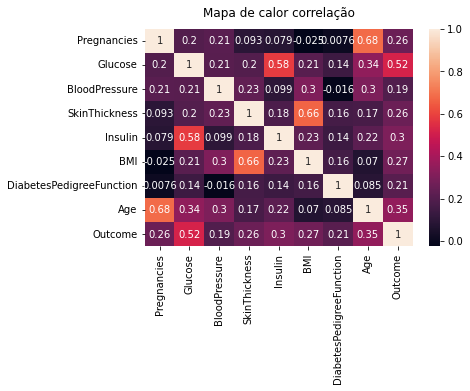

In [47]:
heatmap = sns.heatmap(diabetes_df.corr(), annot=True)
heatmap.set_title('Mapa de calor correlação', fontdict={'fontsize':12}, pad=12);
plt.show()

In [49]:
diabetes_df.Outcome.value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [51]:
X= diabetes_df.loc[:, diabetes_df.columns!='Outcome']
y= diabetes_df.loc[:, diabetes_df.columns=='Outcome']
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=1)

In [52]:
os = SMOTE(random_state = 1)
os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x= pd.DataFrame(os_data_x, columns=x_train.columns)
os_data_y= pd.DataFrame(os_data_y, columns=['Outcome'])
#Geração de dados sinteticos para balanceamento
os_data_y.value_counts()

Outcome
0          180
1          180
dtype: int64

In [54]:
data_final= os_data_x.merge(os_data_y, left_index=True, right_index=True)
data_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,11,136,84,35,130,28.3,0.260,42,1
1,5,121,72,23,112,26.2,0.245,30,0
2,1,128,88,39,110,36.5,1.057,37,1
3,1,95,66,13,38,19.6,0.334,25,0
4,1,77,56,30,56,33.3,1.251,24,0


In [55]:
logreg= LogisticRegression()
rfe= RFE(logreg)
rfe= rfe.fit(os_data_x, os_data_y.values.ravel())

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
#Mostra quais colunas sao importante
print(rfe.support_)
#Ranking de importancia quanto menor o numero mais importante
print(rfe.ranking_)

[False  True False False False  True  True  True]
[2 1 4 3 5 1 1 1]


In [58]:
cols=data_final.columns[(rfe.support_).tolist() + [True]]
x = data_final[cols].drop(['Outcome'], axis=1)
y = data_final['Outcome']

In [59]:
smlr = sm.Logit(y, x)
result= smlr.fit()
print(result.summary())
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.655523
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  360
Model:                          Logit   Df Residuals:                      356
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                 0.05428
Time:                        16:59:44   Log-Likelihood:                -235.99
converged:                       True   LL-Null:                       -249.53
Covariance Type:            nonrobust   LLR p-value:                 5.638e-06
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Glucose                      0.0117      0.004      3.154      0.002       0.004

In [60]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_pred=logreg.predict(x_test)

In [62]:
#Modelos teoricos tem alta %
logreg.score(x_test, y_test)

0.8611111111111112

In [63]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        61
           1       0.82      0.87      0.85        47

    accuracy                           0.86       108
   macro avg       0.86      0.86      0.86       108
weighted avg       0.86      0.86      0.86       108



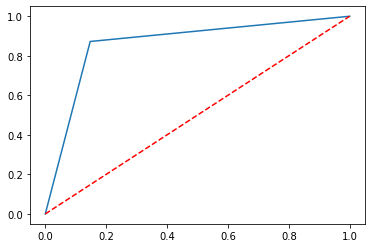

In [64]:
roc_auc=metrics.roc_auc_score(y_test,y_pred)
fpr, tpr, threshold =metrics.roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.show()

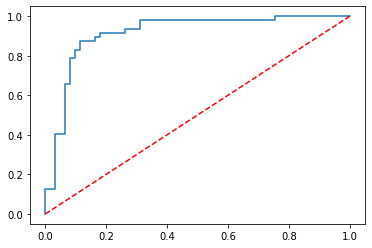

In [65]:
roc_auc=metrics.roc_auc_score(y_test,y_pred)
fpr, tpr, threshold =metrics.roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.show()


[[52  9]
 [ 6 41]]


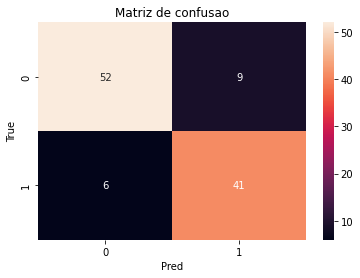

In [66]:
#Matriz de confusao F-Score no wikipedia Usado em saber se classifica certo
mc=metrics.confusion_matrix(y_test, y_pred)
print(mc)
sns.heatmap(mc, annot=True)
plt.title('Matriz de confusao')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()